# 실습 예제 연습용 주피터  


## KNN 2주차 실습

In [2]:
import numpy as np
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

fish_data = np.column_stack((fish_length, fish_weight))
fish_target = np.concatenate((np.ones(35), np.zeros(14)))

In [3]:
print(fish_data.shape)
print(fish_target.reshape(-1,1).shape)

(49, 2)
(49, 1)


### 데이터 스케일링

In [4]:
tr_mean = np.mean(train_input, axis=0)
tr_std = np.std(train_input, axis=0)
te_mean = np.mean(test_input, axis=0)
te_std = np.std(test_input, axis=0)

train_scaled = (train_input - tr_mean) / tr_std
test_scaled = (test_input - te_mean) / te_std

#z-score scaling

NameError: name 'train_input' is not defined

### 훈련/테스트 나누기

In [ ]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(
    fish_data, fish_target, random_state=42)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()
kn.fit(train_input, train_target)
#kn.fit(train_scaled, train_target) # 정규화
print(kn.score(test_scaled, test_target))
print(kn.predict([[25, 150]]))

0.23076923076923078
[0.]


### 시각화

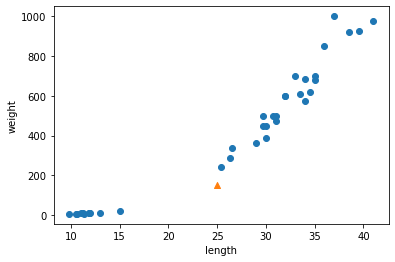

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

### 최소거리

In [ ]:
distances, indexes = kn.kneighbors(X=[[25, 150]])
print(distances)
print(indexes)

[[ 92.00086956 130.48375378 138.32150953 140.00603558 140.62090883]]
[[12 29  5 19  4]]


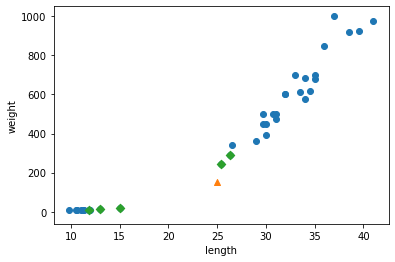

In [ ]:
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker='^')
plt.scatter(train_input[indexes,0], train_input[indexes,1], marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

### 시각화

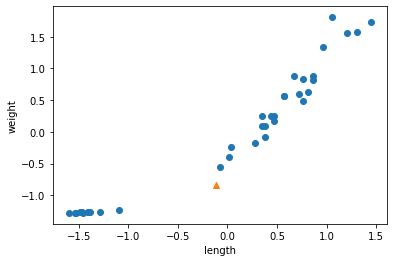

In [ ]:
import matplotlib.pyplot as plt
new = ([25, 150] - tr_mean) / tr_std
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0], new[1], marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

## 규제, 제약식, 회귀 3주차

In [ ]:
from sklearn import datasets
raw_boston = datasets.load_boston()
print(raw_boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

### 데이터와 라벨 처리

In [ ]:
X = raw_boston.data[:,5] # 5개 특성
y = raw_boston.target

print(raw_boston.data.shape)
print(X.shape)

(506, 13)
(506,)
(506,)


### 훈련 세트와 테스트세트 나누기

In [ ]:
from sklearn.model_selection import train_test_split
x_tn, x_te, y_tn, y_te = train_test_split(X,y ,random_state=0)
print(x_tn.shape)
print(y_tn.shape)
print(x_te.shape)
print(y_te.shape)

(379,)
(379,)
(127,)
(127,)


### 선형회귀 훈련

In [ ]:
from sklearn.linear_model import LinearRegression
clf_lr =LinearRegression()
clf_lr.fit(x_tn.reshape(-1,1), y_tn.reshape(-1,1))
print(clf_lr.score(x_te.reshape(-1,1),y_te.reshape(-1,1)))

0.4679000543136781


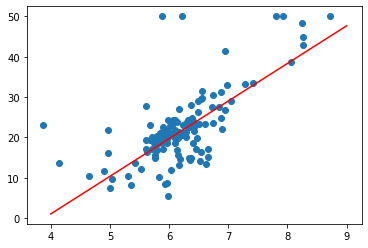

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
plt.scatter(x_te,y_te)
plt.plot([4,9],[ 4*clf_lr.coef_[0] + clf_lr.intercept_, 9* clf_lr.coef_ + clf_lr.intercept_],'r')

## 서포트 벡터 머신 4주차 - 1 

In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data[:,:2] ## 길이와 폭만 사용
y = iris.target

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


In [ ]:
from sklearn.model_selection import train_test_split
x_tn, x_te, y_tn, y_te = train_test_split(X,y, random_state = 0)


In [ ]:
from sklearn.svm import SVC
model = SVC(kernel='linear',C=1e10).fit(x_tn,y_tn)


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_te,model.predict(x_te)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.79      0.69      0.73        16
           2       0.55      0.67      0.60         9

    accuracy                           0.79        38
   macro avg       0.78      0.78      0.78        38
weighted avg       0.80      0.79      0.79        38



### 예제

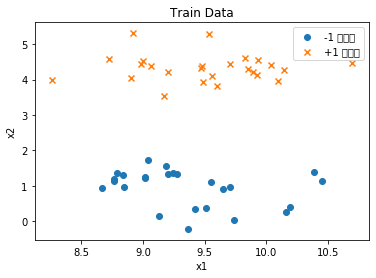

In [ ]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

X, y = make_blobs(n_samples=50, centers=2, cluster_std=0.5, random_state=4)
y = 2 * y - 1

plt.scatter(X[y == -1, 0], X[y == -1, 1], marker='o', label="-1 클래스")# 0번째 줄, 
plt.scatter(X[y == +1, 0], X[y == +1, 1], marker='x', label="+1 클래스")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.title("Train Data")
plt.show()

## SVM 모델 훈련

In [ ]:
from sklearn.svm import SVC
model = SVC(kernel='linear',C=1e10).fit(X,y) # C는 slack variable

## 시각화

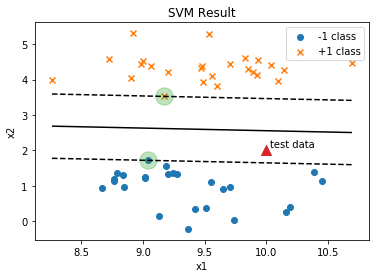

In [ ]:
import numpy as np

xmin = X[:, 0].min()
xmax = X[:, 0].max()
ymin = X[:, 1].min()
ymax = X[:, 1].max()
xx = np.linspace(xmin, xmax, 10) # min~ max 10분할
yy = np.linspace(ymin, ymax, 10)
X1, X2 = np.meshgrid(xx, yy) #직사각형의 그리드

Z = np.empty(X1.shape) #배열 생성 - 쓰레기값

for (i, j), val in np.ndenumerate(X1):
    x1 = val
    x2 = X2[i, j]
    p = model.decision_function([[x1, x2]])
    Z[i, j] = p[0]

levels = [-1, 0, 1]
linestyles = ['dashed', 'solid', 'dashed']
plt.scatter(X[y == -1, 0], X[y == -1, 1], marker='o', label="-1 class")
plt.scatter(X[y == +1, 0], X[y == +1, 1], marker='x', label="+1 class")
plt.contour(X1, X2, Z, levels, colors='k', linestyles=linestyles)
plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=300, alpha=0.3)

x_new = [10, 2]
plt.scatter(x_new[0], x_new[1], marker='^', s=100)
plt.text(x_new[0] + 0.03, x_new[1] + 0.08, "test data")

plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.title("SVM Result")

plt.show()

SVC를 사용하여 모형을 구하면 다음과 같은 속성값을 가진다.

n_support_: 각 클래스의 서포트의 개수

support_: 각 클래스의 서포트의 인덱스

support_vectors_: 각 클래스의 서포트의 x 값. 𝑥+와 𝑥−

coef_: 𝑤 벡터

intercept_: −𝑤0

dual_coef_: 각 원소가 𝑎𝑖⋅𝑦𝑖로 이루어진 벡터

In [ ]:
model.n_support_ # 서포트 개수

array([1, 1])

In [ ]:
model.support_ # 서포트의 인덱스

array([42,  1])

In [ ]:
model.support_vectors_ #각 클래스의 서포트의 x 값. 𝑥+와 𝑥−

array([[9.03715314, 1.71813465],
       [9.17124955, 3.52485535]])

In [ ]:
model.coef_

array([[0.08171082, 1.10091404]])

In [ ]:
model.intercept_

array([-3.62995208])

In [ ]:
y[model.support_]

array([-1,  1])

## 커널 svm 예제

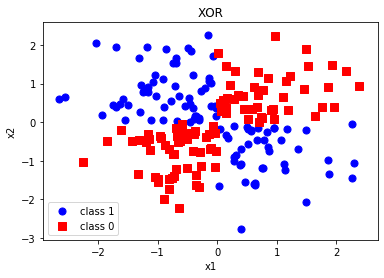

In [ ]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

np.random.seed(0)
X_xor = np.random.randn(200,2)
y_xor = np.logical_xor(X_xor[:,0] >0, X_xor[:,1] >0)
y_xor = np.where(y_xor, 1,0)

plt.scatter(X_xor[y_xor == 1,0], X_xor[y_xor==1,1], c='b', marker='o', label='class 1', s=50)
plt.scatter(X_xor[y_xor == 0,0], X_xor[y_xor==0,1], c='r', marker='s', label='class 0', s=50)
plt.legend()
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('XOR')
plt.show()

## 가우시안 나이브 베이즈  4주차 - 2

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_te, model.predict(x_te)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.73      0.69      0.71        16
           2       0.50      0.56      0.53         9

    accuracy                           0.76        38
   macro avg       0.74      0.75      0.75        38
weighted avg       0.77      0.76      0.77        38



In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data[:, :2]
y = iris.target

In [ ]:
from sklearn import datasets
raw_wine = datasets.load_wine()
X = raw_wine.data
y = raw_wine.target

In [ ]:
#data 전처리
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(X,y,random_state=0)

#data stardardize
from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler()
std_scale.fit(X_train) # train data 정규화의 필요한 파라미터 뽑음
X_tn_std = std_scale.transform(X_train) #실제 정규화 일어남
X_te_std = std_scale.transform(X_test) # 실제 정규화
#정답은 정규화 할 필요 없음(categorical)

In [ ]:
#모델 학습 (Gaussian Naive Bayes)
from sklearn.naive_bayes import GaussianNB
#가우시안이 무엇을 하는가
#표본평균하고 표본분산을 가진 정규분포하에 베이즈정리를 적용
mdl = GaussianNB()
mdl.fit(X_tn_std, y_train)

GaussianNB()

In [ ]:
pred = mdl.predict(X_te_std)
print(pred)

[0 2 1 0 1 1 0 2 1 1 2 2 0 0 2 1 0 0 2 0 0 0 0 1 1 1 1 1 1 2 0 0 1 0 0 0 2
 1 1 2 0 0 1 1 1]


In [ ]:
#성능 확인
from sklearn.metrics import classification_report
class_report = classification_report(y_test,pred)
print(class_report)

## Unsupervise Learning #1 - 9주차

### 비지도 학습 -K-평균 클러스터링

In [ ]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters =3, random_state = 42)
km.fit(fruits_2d)

KMeans(n_clusters=3, random_state=42)

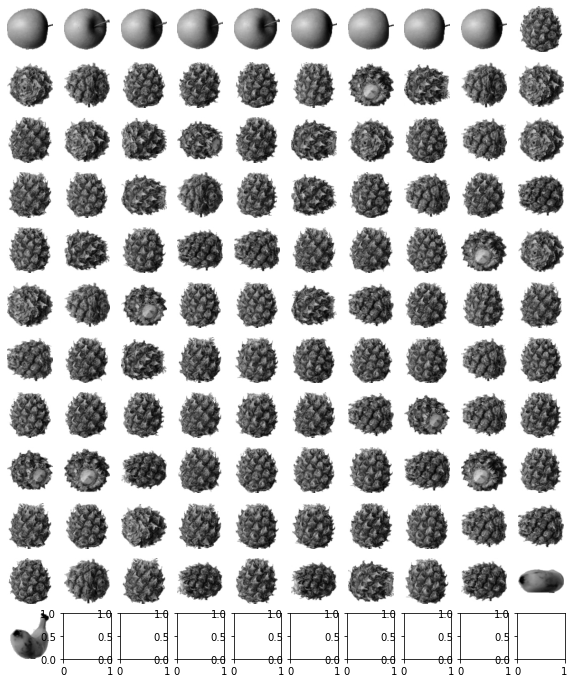

In [ ]:
draw_fruits(fruits[km.labels_==0])

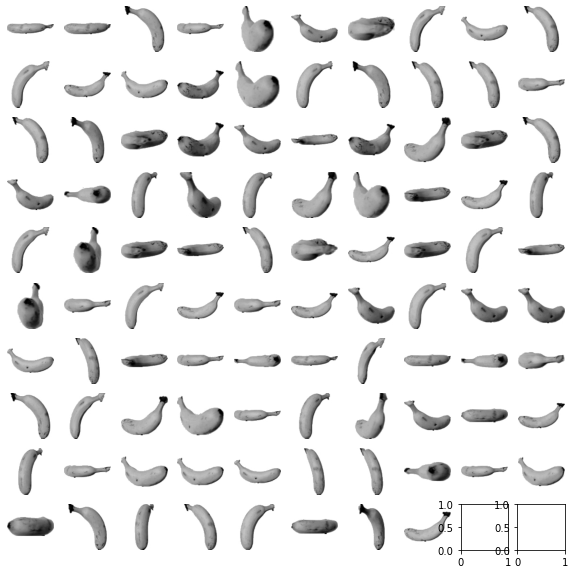

In [ ]:
draw_fruits(fruits[km.labels_==1])

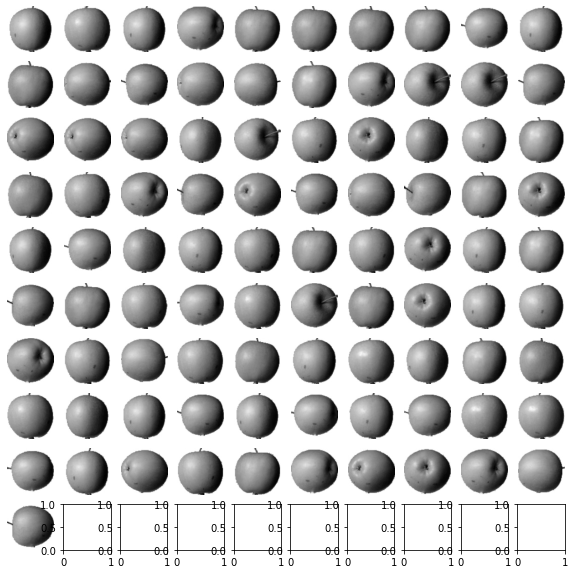

In [ ]:
draw_fruits(fruits[km.labels_==2])

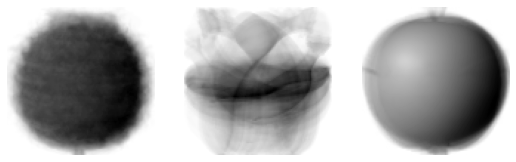

[[3393.8136117  8837.37750892 5267.70439881]]


In [ ]:
draw_fruits(km.cluster_centers_.reshape(-1,100,100), ratio=3)
print(km.transform(fruits_2d[100:101]))


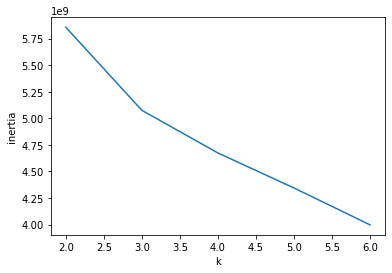

In [ ]:
inertia= []
for k in range(2,7):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(fruits_2d)
    inertia.append(km.inertia_)
plt.plot(range(2,7), inertia)
plt.xlabel('k')
plt.ylabel('inertia')
plt.show()

## PCA 실습

In [10]:
def draw_fruits(arr, ratio=1):
    n = len(arr)
    rows = int(np.ceil(n/10))
    cols = n if rows < 2 else 10
    fig, axs = plt.subplots(rows, cols, figsize=(cols*ratio, rows*ratio), squeeze=False)
    for i in range(rows):
        for j in range(cols):
            if i*10 + j <n:
                axs[i,j].imshow(arr[i*10+j], cmap='gray_r')
                axs[i,j].axis('off')
    plt.show()

In [11]:
!python -m wget https://bit.ly/fruits_300_data -o fruits_300.npy

import numpy as np
import matplotlib.pyplot as plt
fruits =np.load('fruits_300.npy')
fruits_2d = fruits.reshape(-1, 100*100)


Saved under fruits_300 (2).npy


In [12]:
from sklearn.decomposition import PCA
pca = PCA(n_components=50)
pca.fit(fruits_2d)

print(pca.components_.shape)

(50, 10000)


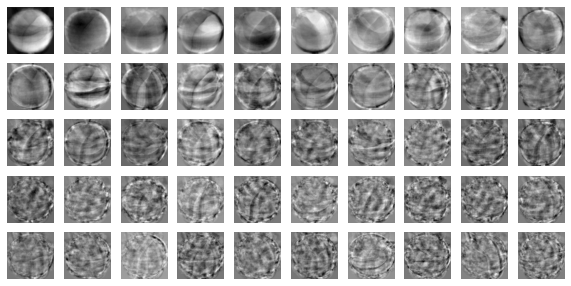

In [13]:
draw_fruits(pca.components_.reshape(-1,100,100))


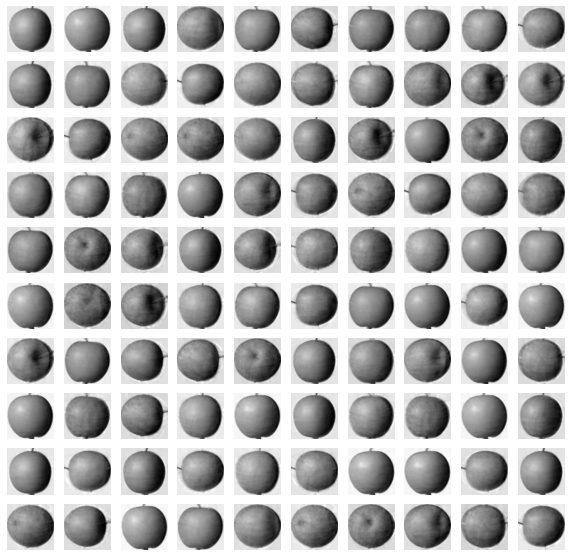

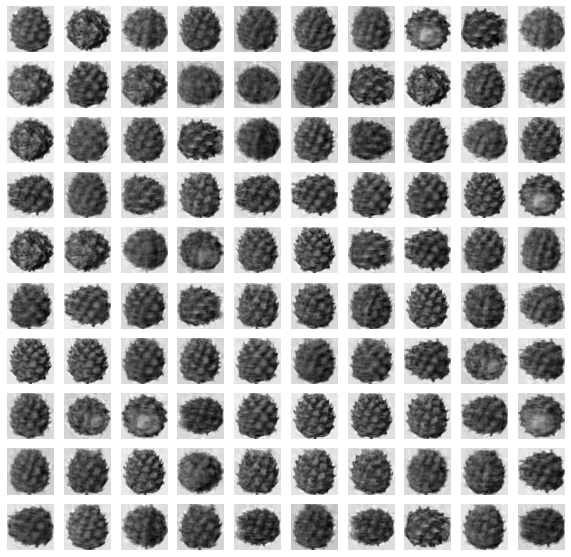

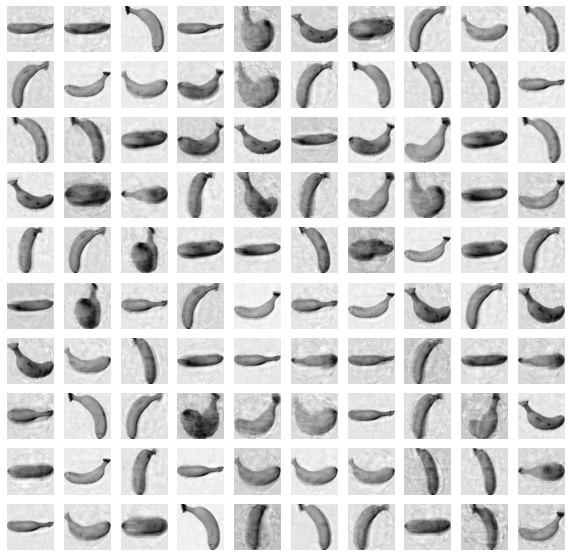

In [14]:
fruits_pca = pca.transform(fruits_2d) # 차원축소
fruits_inverse = pca.inverse_transform(fruits_pca) # 차원 돌리기

fruits_reconstruct = fruits_inverse.reshape(-1,100,100)

for start in [0, 100, 200]:
    draw_fruits(fruits_reconstruct[start:start+100])
    print()

0.9215436704943315


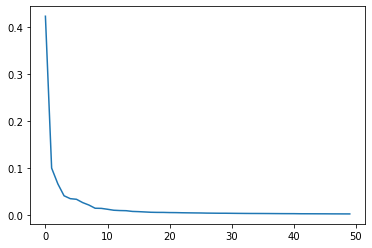

In [16]:
import numpy as np
print(np.sum(pca.explained_variance_ratio_))
plt.plot(pca.explained_variance_ratio_)
plt.show()

In [17]:
from sklearn import datasets
raw_wine = datasets.load_wine()

X= raw_wine.data
y = raw_wine.target

from sklearn.model_selection import train_test_split
X_tn, X_te ,y_tn, y_te= train_test_split(X,y,random_state=1)

from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler()
std_scale.fit(X_tn)
X_tn_std = std_scale.transform(X_tn)
X_te_std =std_scale.transform(X_te)

from sklearn.decomposition import KernelPCA
k_pca = KernelPCA(n_components=2,kernel='poly')
k_pca.fit(X_tn_std)
X_tn_kpca = k_pca.transform(X_tn_std)
X_te_kpca = k_pca.transform(X_te_std)


In [19]:
print(X_tn_std.shape)
print(X_tn_kpca.shape)
print(k_pca.lambdas_)

(133, 13)
(133, 2)
[193.89824561 118.0368972 ]


Index(['kpca_compl', 'kpca_comp2', 'target'], dtype='object')


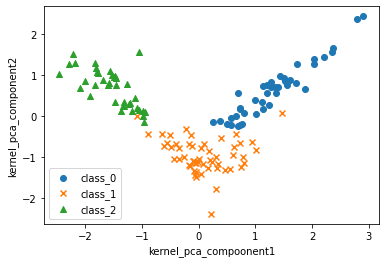

In [41]:
import pandas as pd
kpca_columns = ['kpca_compl', 'kpca_comp2']
X_tn_kpca_df = pd.DataFrame(X_tn_kpca, columns=kpca_columns)
X_tn_kpca_df['target'] = y_tn
X_tn_kpca_df.head(5)

import matplotlib.pyplot as plt
df = X_tn_kpca_df
markers=['o','x','^']
print(df.columns)
for i, mark in enumerate(markers):
    X_i = df[df['target'] == i]
    target_i = raw_wine.target_names[i]
    X1 = X_i['kpca_compl']
    X2 = X_i['kpca_comp2']
    plt.scatter(X1,X2,marker=mark, label=target_i)
    
plt.xlabel("kernel_pca_compoonent1")
plt.ylabel('kernel_pca_component2')
plt.legend()
plt.show()

In [43]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
target = np.array([0]*100 + [1] * 100 + [2]*100)

from sklearn.model_selection import cross_validate
scores = cross_validate(lr, fruits_2d, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

pca = PCA(n_components=0.5)
pca.fit(fruits_2d)
print(pca.n_components_)

0.9966666666666667
0.9986128330230712
2


In [44]:
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, random_state=42)
km.fit(fruits_pca)
print(np.unique(km.labels_, return_counts=True))


(300, 2)


c:\Users\SeungYun\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\SeungYun\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n

0.99
0.06333317756652831
(array([0, 1, 2]), array([110,  99,  91], dtype=int64))


c:\Users\SeungYun\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [16]:
from sklearn import datasets
raw_wine = datasets.load_wine()

X= raw_wine.data
y = raw_wine.target

from sklearn.model_selection import train_test_split
X_tn, X_te, y_tn, y_te = train_test_split(X,y,random_state=1)

from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler()
std_scale.fit(X_tn)
X_tn_std = std_scale.transform(X_tn)
X_te_std = std_scale.transform(X_te)

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X_tn_std)
X_tn_pca = pca.transform(X_tn_std)
X_te_pca = pca.transform(X_te_std)

print(X_tn_std.shape,X_tn_pca.shape)
print(pca.get_covariance()) # cov(x,y)



(133, 13) (133, 2)
[[ 1.06244198  0.05588975  0.29643474 -0.14674317  0.38769443  0.25079577
   0.19779094 -0.10070718  0.17126277  0.44742545 -0.12013532  0.02879752
   0.50505224]
 [ 0.05588975  0.86510155  0.11906446  0.23837434  0.00721146 -0.39785163
  -0.4503856   0.31716671 -0.30728109  0.30100181 -0.42357315 -0.45825394
  -0.14345856]
 [ 0.29643474  0.11906446  0.72597065 -0.01380654  0.20891722  0.02618151
  -0.01633577  0.03209892  0.00824227  0.32033554 -0.17879769 -0.10868048
   0.2307792 ]
 [-0.14674317  0.23837434 -0.01380654  0.77557799 -0.13456582 -0.4028355
  -0.42487887  0.28525095 -0.30301432  0.07431753 -0.28885443 -0.36992936
  -0.2952175 ]
 [ 0.38769443  0.00721146  0.20891722 -0.13456582  0.82428285  0.22898335
   0.19490044 -0.10843832  0.16009666  0.30262412 -0.0453494   0.06951315
   0.39222323]
 [ 0.25079577 -0.39785163  0.02618151 -0.4028355   0.22898335  1.21144743
   0.7122459  -0.47784458  0.50827447 -0.11953458  0.48155509  0.61862946
   0.49873766]
 [ 0

In [15]:
print(pca.singular_values_) #eigen value
print(pca.components_) # eigen vector

print(pca.explained_variance_)

[24.81797394 18.31760391]
[[-0.10418545  0.25670612  0.01387486  0.23907587 -0.10470229 -0.4007005
  -0.42902734  0.29111343 -0.30307602  0.12127653 -0.31609521 -0.38729685
  -0.26283936]
 [-0.49018724 -0.1691503  -0.30746987  0.04459018 -0.34837302 -0.07966456
  -0.0133774  -0.02498633 -0.0415164  -0.50798383  0.26045807  0.14018631
  -0.39850143]]
[4.66615023 2.54192889]


In [17]:
import pandas as pd
pca_columns = ['pca_compl', 'pca_comp2']
X_tn_pca_df = pd.DataFrame(X_tn_pca,columns=pca_columns)
X_tn_pca_df['target'] =y_tn
X_tn_pca_df.head(5)

,pca_compl,pca_comp2,target
0,-2.231848,-0.148603,0
1,-1.364444,0.422617,1
2,-1.918072,-2.014682,0
3,-3.539272,-2.878394,0
4,-3.182320,-2.020041,0


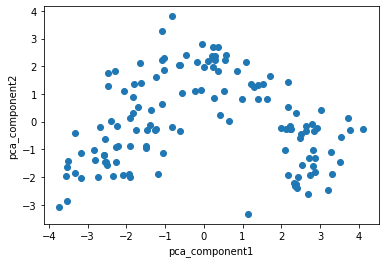

In [19]:
import matplotlib.pyplot as plt
plt.scatter(X_tn_pca_df['pca_compl'], X_tn_pca_df['pca_comp2'], marker='o')
plt.xlabel("pca_component1")
plt.ylabel("pca_component2")
plt.show()

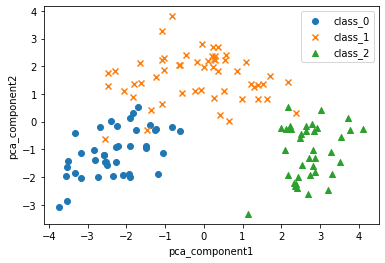

In [22]:
df = X_tn_pca_df
markers=['o','x','^']

for i, mark in enumerate(markers):
    df_i = df[df['target'] ==i]
    target_i = raw_wine.target_names[i] # target i번째 추출
    X1 = df_i['pca_compl']
    X2 = df_i['pca_comp2']
    plt.scatter(X1,X2,marker=mark,label=target_i)
plt.xlabel("pca_component1")
plt.ylabel("pca_component2")
plt.legend()
plt.show()

In [24]:
# PCA 적용전 예측 정확도
from sklearn.ensemble import RandomForestClassifier
clf_rf = RandomForestClassifier(max_depth=2, random_state=0)
clf_rf.fit(X_tn_std,y_tn)
#predict
pred_rf = clf_rf.predict(X_te_std)

In [26]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_te, pred_rf)
print(accuracy)

0.9777777777777777


In [27]:
#PCA 적용 후
from sklearn.ensemble import RandomForestClassifier
clf_rf_pca = RandomForestClassifier(max_depth=2, random_state=0)
clf_rf_pca.fit(X_tn_pca,y_tn)
#predict
pred_rf_pca = clf_rf_pca.predict(X_te_pca)


In [29]:
accuracy_pca = accuracy_score(y_te, pred_rf_pca)
print(accuracy_pca)

0.9555555555555556
